In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

### All necessary libraries are imported

In [14]:
#CSV file is imported as a dataframe "data"
uber_data = pd.read_csv("Uber Request Data.csv")
uber_data.head(15)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


#### Now check if there are duplicate values in " Request id "

In [15]:
uber_data.duplicated(subset = "Request id").any()

False

#### Let's see dimension of the dataframe "data"

In [16]:
uber_data.shape

(6745, 6)

**Check NA values in data**

In [17]:
uber_data.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

**Column-wise percentage of NA values**

In [18]:
uber_data.isnull().sum()*100/uber_data.shape[0] 

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

**Correcting date-time format of Request timestamp and Drop timestamp**

In [19]:
uber_data['Request timestamp']=pd.to_datetime(uber_data['Request timestamp'])
uber_data['Drop timestamp']=pd.to_datetime(uber_data['Drop timestamp'])
uber_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


**Check what object each column of the dataset is !**

In [20]:
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.2+ KB


**Checking Null values in Drop timestamp column**

In [21]:
uber_data[(uber_data['Drop timestamp'].isnull())].groupby('Status').size()

Status
Cancelled            1264
No Cars Available    2650
dtype: int64

Here Null values are not invalid because when the trip doesn't happen then the Drop timestamp is unavailabe resulting empty rows and the status is either Cancelled or No Cars Available

In [22]:
print(uber_data['Status'].unique())

['Trip Completed' 'Cancelled' 'No Cars Available']


**Check for Duplicate values**

In [23]:
len(uber_data[uber_data.duplicated()].index)

0

# Analysis of uber_data

## Univariate Analysis

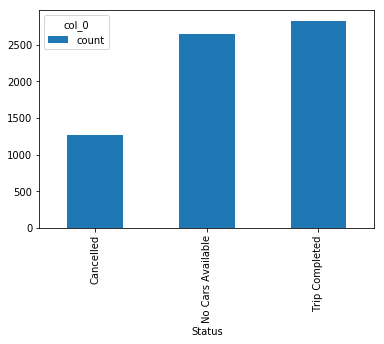

In [24]:
status = pd.crosstab(index=uber_data["Status"], columns="count")
status.plot.bar()

_Here we can see the count of status : No Cars Available is near the count of status : Trip Completed and this is the problem faced by UBER._

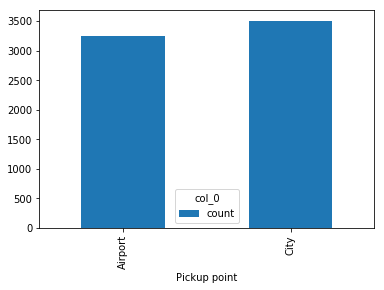

In [25]:
pickup=pd.crosstab(index=uber_data['Pickup point'],columns="count")
pickup.plot.bar()

_Here we can see that the mostly passengers are picked up from the city. But also there is not much difference in count of pickup from Airport_

## Bivariate Analysis

In [26]:
uber_data.groupby(['Status','Pickup point']).size()

Status             Pickup point
Cancelled          Airport          198
                   City            1066
No Cars Available  Airport         1713
                   City             937
Trip Completed     Airport         1327
                   City            1504
dtype: int64

_Here is the info about count of each Status from every Pickup point_

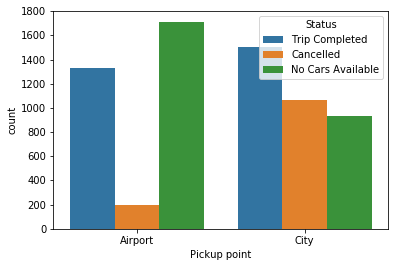

In [27]:
sns.countplot(x=uber_data['Pickup point'], hue=uber_data['Status'], data=uber_data)

_From the graph it can be deduced that there are more "No cars available" from Airport to City and more cars "Cancelled" from City to Airport_

**Extracting hour and day from Request timestamp**

In [28]:
req_hour = uber_data["Request timestamp"].dt.hour
uber_data["req_hour"] = req_hour
req_day = uber_data["Request timestamp"].dt.day
uber_data["req_hour"] = req_hour

**Creating Time slots for various time period of day**

In [29]:
#timestamp divided into four categories
def time_period(x):    
    if x < 5:
        return "Early_Morning"
    elif 5 <= x < 11:
        return "Late_Morning"
    elif 11 <= x < 16:
        return "Noon"
    elif 16 <= x < 20:
        return "Evening"
    elif 20 <= x < 22:
        return "Night"
    else:
        return "Late_Night"

uber_data['time_slot'] = uber_data.req_hour.apply(lambda x: time_period(x))

In [30]:
uber_data.time_slot.value_counts()

Late_Morning     2346
Evening          1560
Night             941
Noon              822
Early_Morning     578
Late_Night        498
Name: time_slot, dtype: int64

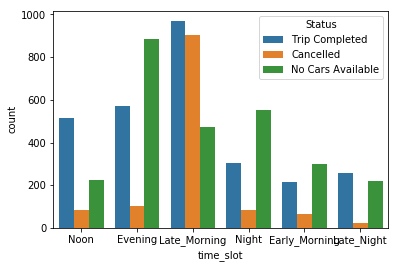

In [31]:
sns.countplot(x = "time_slot", hue = "Status", data = uber_data)

_From the graph we can deduce that "No car available" is mostly not found during evening and most car "Cancelled" is found in the  Morning_

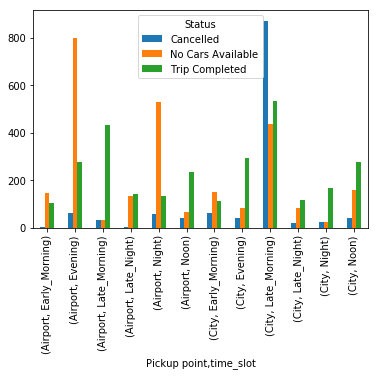

In [32]:
pickup_df = pd.DataFrame(uber_data.groupby(['Pickup point','time_slot', 'Status'])['Request id'].count().unstack(fill_value=0))
pickup_df.plot.bar()

_From the graph we can deduce that most " No Cars Available " are in the Evening from Airport to City and most " Cancelled " trips are in the Morning from City to Airport._ 

# Understanding The Demand Supply Gap

In [33]:
uber_data['Demand']=1
uber_data['Delivery']=0
uber_data.loc[(uber_data['Status']=='Trip Completed'),'Delivery']=1
uber_data['Gap']=uber_data['Demand']-uber_data['Delivery']
uber_data.loc[uber_data['Gap']==0, 'Gap']='Trip is completed'
uber_data.loc[uber_data['Gap']==1, 'Gap']='Trip is not completed'

In [34]:
uber_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,time_slot,Demand,Delivery,Gap
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,Noon,1,1,Trip is completed
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,Evening,1,1,Trip is completed
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,Late_Morning,1,1,Trip is completed
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,Night,1,1,Trip is completed
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Late_Morning,1,1,Trip is completed


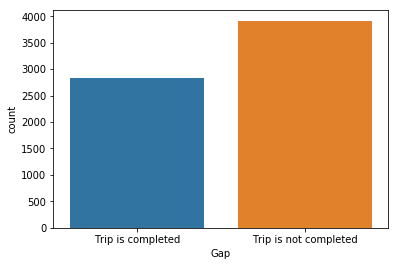

In [35]:
sns.countplot(x=uber_data['Gap'], data = uber_data)

_It's clear from the graph that most of the trips are incomplete (either "Cancelled" or "No Cars Available")._

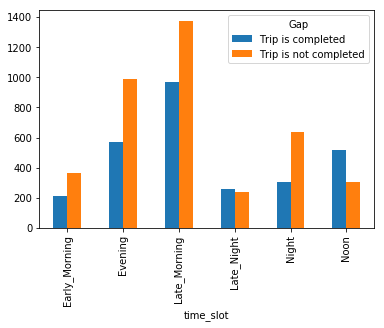

In [36]:
gap_timeslot_df = pd.DataFrame(uber_data.groupby(['time_slot','Gap'])['Request id'].count().unstack(fill_value=0))
gap_timeslot_df.plot.bar()

_In the above graph we can see that in evening most of the trips are not completed._

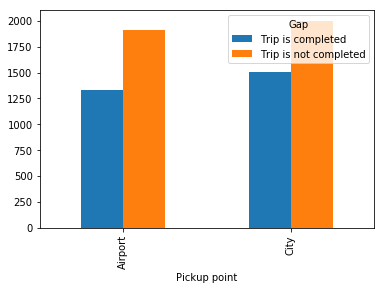

In [37]:
gap_pickup_df = pd.DataFrame(uber_data.groupby(['Pickup point','Gap'])['Request id'].count().unstack(fill_value=0))
gap_pickup_df.plot.bar()

_In the above graph we can see that from City most of the trips are not completed. But the values are nearly equal to those of from Airport._

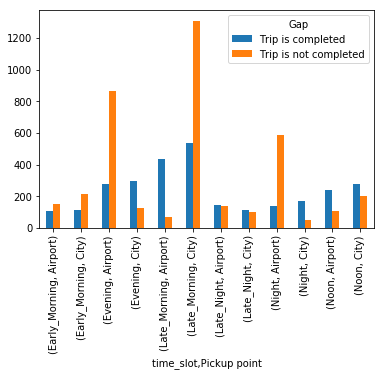

In [38]:
#Plot to count the number of requests that was completed and which was not, for the final analysis
gap_df = pd.DataFrame(uber_data.groupby(['time_slot','Pickup point','Gap'])['Request id'].count().unstack(fill_value=0))
gap_df.plot.bar()

_From this final graph we can deduce "Trip is not completed" are more from Airport during the evening time._